## Lesson 5. Reproject Raster Data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import earthpy as et

In [2]:
data_path = et.data.get_data('colorado-flood')

Open road centreline data for Boulder, CO. Take note of CRS.

In [3]:
boulder_roads = gpd.read_file('https://opendata.arcgis.com/datasets/5388d74deeb8450e8b0a45a542488ec8_0.geojson')

In [4]:
boulder_roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
data_path = et.data.get_data('colorado-flood')
aoi_path = os.path.join(data_path,
                        'spatial',
                        'boulder-leehill-rd',
                        'clip-extent.shp')

In [6]:
crop_extent = gpd.read_file(aoi_path)

In [7]:
crop_extent_wgs84 = crop_extent.to_crs(boulder_roads.crs)

In [8]:
roads_clip = gpd.clip(boulder_roads, crop_extent_wgs84)

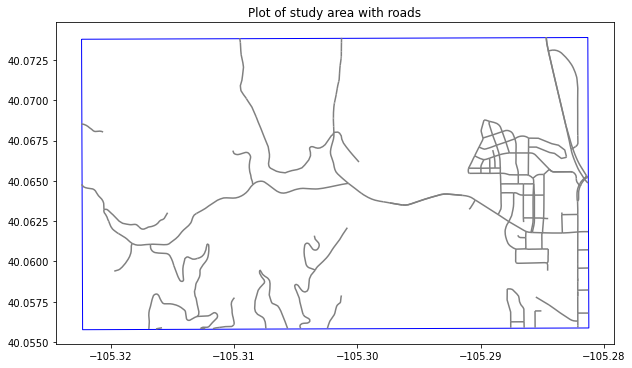

In [9]:
f, ax = plt.subplots(figsize=(10,8))
crop_extent_wgs84.plot(ax=ax,
                       edgecolor='blue',
                       color='white')
roads_clip.plot(ax=ax,
                color='grey')
ax.set(title='Plot of study area with roads')
plt.show()

Open raster data

In [10]:
lidar_dem_path = os.path.join(data_path,
                              'spatial',
                              'boulder-leehill-rd',
                              'pre-flood',
                              'lidar',
                              'pre_DTM.tif')
lidar_dem = rxr.open_rasterio(lidar_dem_path, masked=True).squeeze()

In [12]:
lidar_dem.rio.crs

CRS.from_epsg(32613)

Just note that the data do not line up without reprojection

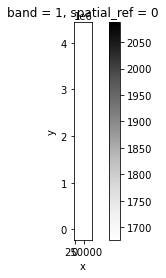

In [13]:
f, ax = plt.subplots()
lidar_dem.plot.imshow(ax=ax,
                      cmap='Greys')
roads_clip.plot(ax=ax)
plt.show()

So reproject the data

In [14]:
lidar_dem_wgs84 = lidar_dem.rio.reproject(roads_clip.crs)
lidar_dem_wgs84.rio.crs

CRS.from_epsg(4326)

Or can reproject using the proj4 string

In [15]:
crs_wgs84 = CRS.from_string('EPSG:4326')

In [16]:
lidar_dem_wgs84_2 = lidar_dem.rio.reproject(crs_wgs84)
lidar_dem_wgs84_2.rio.crs

CRS.from_epsg(4326)

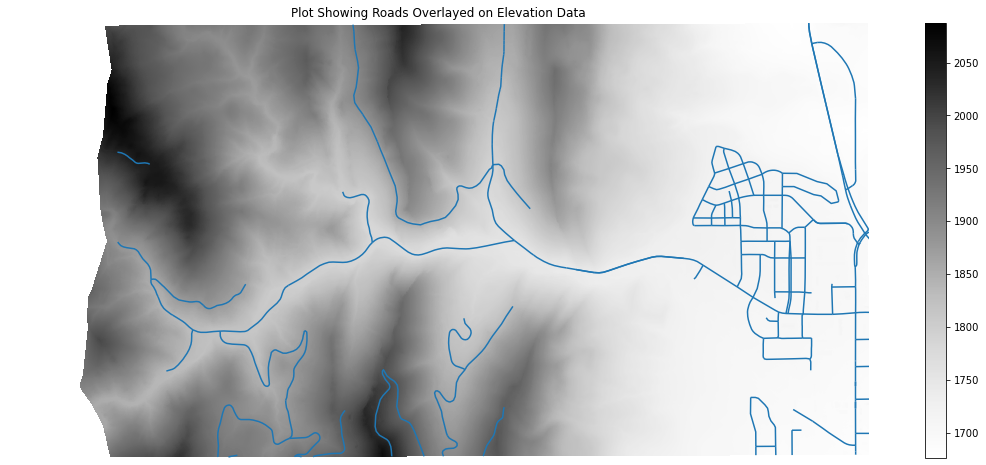

In [19]:
f, ax = plt.subplots(figsize=(20,8))
lidar_dem_wgs84.plot.imshow(ax=ax,
                            cmap='Greys')
roads_clip.plot(ax=ax)
ax.set(title='Plot Showing Roads Overlayed on Elevation Data')
ax.set_axis_off()
plt.show()

### Challenge: Reproject a Hillshade Layer

In [20]:
dem_hill_path = os.path.join(data_path,
                             'spatial',
                             'boulder-leehill-rd',
                             'pre-flood',
                             'lidar',
                             'pre_DTM_hill.tif')
dem_hill = rxr.open_rasterio(dem_hill_path, masked=True).squeeze()

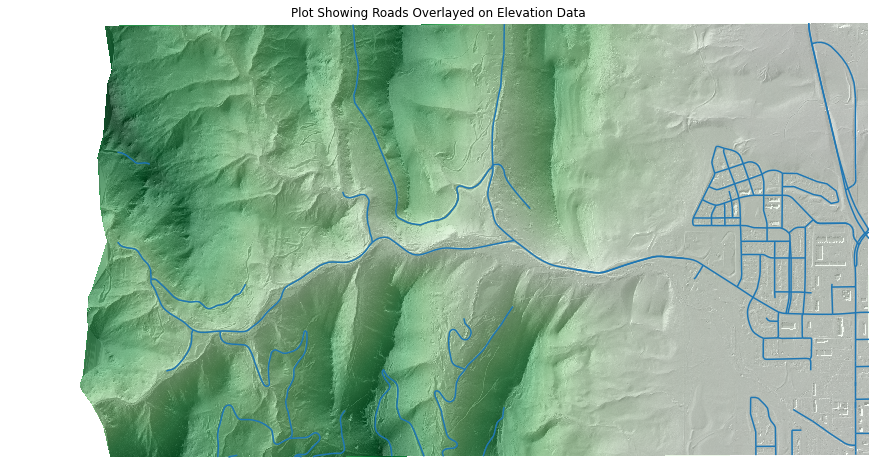

In [30]:
f, ax = plt.subplots(figsize=(20,8))

lidar_dem_wgs84.plot.imshow(ax=ax,
                            cmap='Greens',
                            add_colorbar=False)

dem_hill.rio.reproject(lidar_dem_wgs84.rio.crs).plot.imshow(ax=ax,
                                                            cmap='Greys',
                                                            alpha=0.4,
                                                            add_colorbar=False)

roads_clip.plot(ax=ax)
ax.set(title='Plot Showing Roads Overlayed on Elevation Data')
ax.set_axis_off()
plt.show()